In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import os

In [4]:
results_path = "."

In [ ]:
snp_matrix = pd.read_csv(os.path.join(results_path, "snps.csv"), index_col=0)
df_wgs = pd.read_csv(os.path.join(results_path, "metadata/consistified_wgs.csv"), comment="#") 

In [28]:
clades = set(df_wgs["group"])

In [24]:
def snp_matrix_distribution(snp_matrix, df_wgs, clade):
    """
        Returns a distribution of mean snp distance across samples, i.e.
        a list of the means of each row or column in the snp matrix.
    """
    distribution = []
    submissions = df_wgs.loc[df_wgs["group"]==clade]["Submission"].values
    for submission in submissions:
        distribution.append(snp_matrix[submission].loc[submissions].mean())
    return distribution

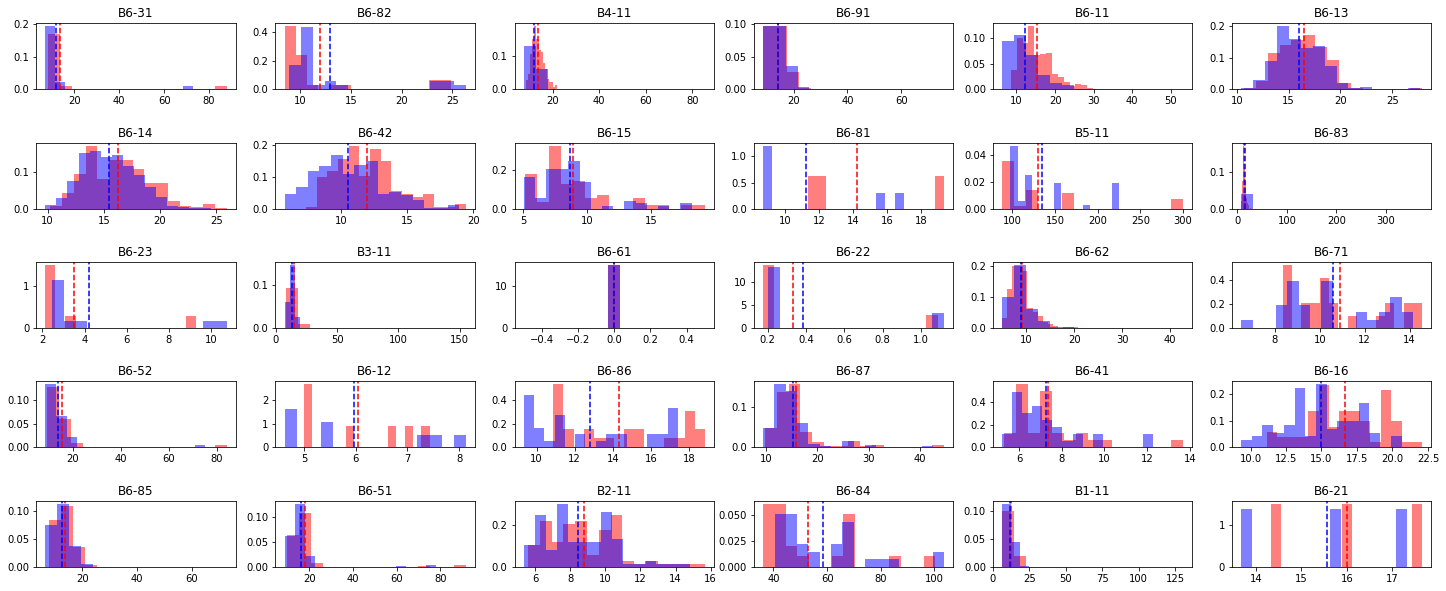

In [67]:
fig, axs = plt.subplots(5, 6, figsize=(25, 10)) 
axs = axs.ravel()
for i in range(len(clades)):
    distribution = snp_matrix_distribution(snp_matrix, df_wgs, list(clades)[i]) 
    axs[i].hist(distribution, alpha=0.5, density=True, color="red", bins=15);
    axs[i].axvline(x=statistics.mean(distribution), color="red", linestyle="--")
    axs[i].set_title(list(clades)[i])
fig.subplots_adjust(hspace=0.8)

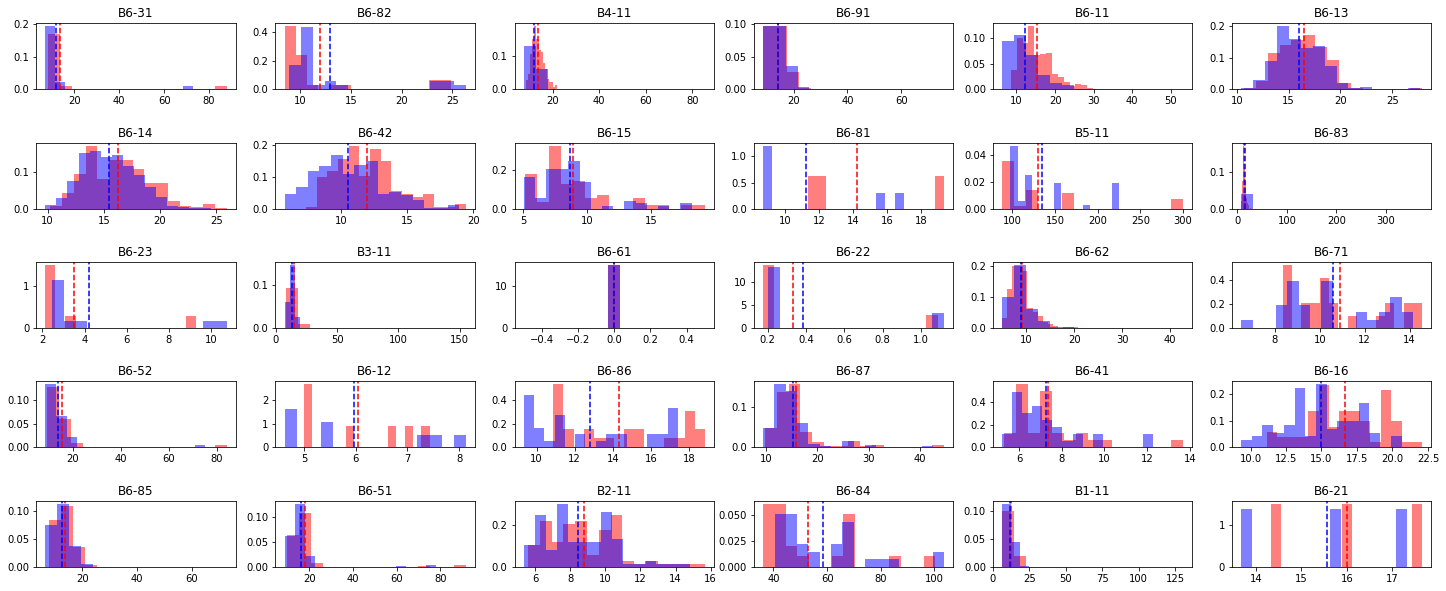

In [ ]:
fig, axs = plt.subplots(5, 6, figsize=(25, 10)) 
axs = axs.ravel()
snp_matrix = pd.read_csv("/home/nickpestell/tmp/test_main/snps.csv", index_col=0)
df_wgs = pd.read_csv("/home/nickpestell/tmp/test_main/metadata/consistified_wgs.csv", comment="#") 
for i in range(len(clades)):
    distribution = snp_matrix_distribution(snp_matrix, df_wgs, list(clades)[i]) 
    axs[i].hist(distribution, alpha=0.5, density=True, color="red", bins=15);
    axs[i].axvline(x=statistics.mean(distribution), color="red", linestyle="--")
    axs[i].set_title(list(clades)[i])
snp_matrix = pd.read_csv("/home/nickpestell/tmp/test_ncount_only_v2/snps.csv", index_col=0)
df_wgs = pd.read_csv("/home/nickpestell/tmp/test_ncount_only_v2/metadata/consistified_wgs.csv", comment="#") 
for i in range(len(clades)):
    distribution = snp_matrix_distribution(snp_matrix, df_wgs, list(clades)[i]) 
    axs[i].hist(distribution, alpha=0.5, density=True, color="blue", bins=15);
    axs[i].axvline(x=statistics.mean(distribution), color="blue", linestyle="--")
    axs[i].set_title(list(clades)[i])
fig.subplots_adjust(hspace=0.8)